Accuracy: 98.54%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



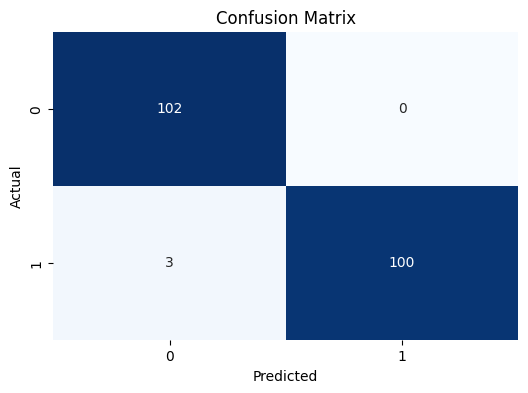

<ipython-input-2-902b5ae0f53a>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


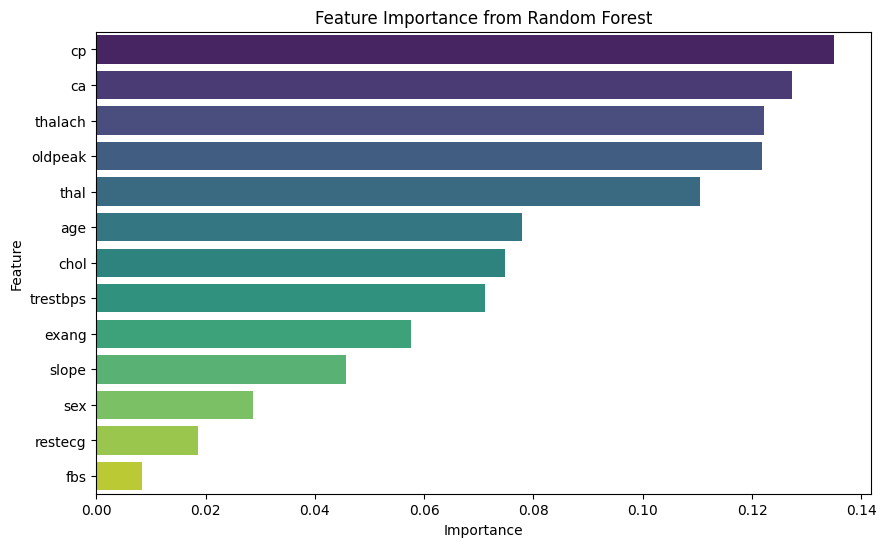

Model and scaler have been saved as 'rf_heart_model.pkl' and 'scaler.pkl'


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('heart.csv')

# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance Visualization
importances = rf_classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.show()

import pickle

# Save the trained Random Forest model to a pickle file
with open('rf_heart_model.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)

# Save the scaler object to a pickle file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler have been saved as 'rf_heart_model.pkl' and 'scaler.pkl'")



In [3]:
# Example new input data (replace values with actual data)
new_data = pd.DataFrame({
    'age': [54],
    'sex': [1],
    'cp': [0],
    'trestbps': [130],
    'chol': [250],
    'fbs': [0],
    'restecg': [1],
    'thalach': [160],
    'exang': [0],
    'oldpeak': [1.0],
    'slope': [2],
    'ca': [0],
    'thal': [2]
})

# Scale the new data with the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict using the trained model
prediction = rf_classifier.predict(new_data_scaled)

# Output prediction
print("Predicted target (0 = no heart disease, 1 = heart disease):", prediction[0])


Predicted target (0 = no heart disease, 1 = heart disease): 1


In [4]:
# Example new input data (changed values)
new_data = pd.DataFrame({
    'age': [45],
    'sex': [0],
    'cp': [2],
    'trestbps': [120],
    'chol': [230],
    'fbs': [0],
    'restecg': [0],
    'thalach': [170],
    'exang': [0],
    'oldpeak': [0.5],
    'slope': [1],
    'ca': [0],
    'thal': [3]
})

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict using the trained Random Forest model
prediction = rf_classifier.predict(new_data_scaled)

# Output prediction
print("Predicted target (0 = no heart disease, 1 = heart disease):", prediction[0])


Predicted target (0 = no heart disease, 1 = heart disease): 1


In [5]:
# Example input values likely to result in no heart disease (target = 0)
new_data = pd.DataFrame({
    'age': [40],
    'sex': [0],         # Female (usually slightly lower risk factor)
    'cp': [0],          # Chest pain type 0 (asymptomatic)
    'trestbps': [110],  # Normal resting blood pressure
    'chol': [180],      # Normal cholesterol
    'fbs': [0],         # Fasting blood sugar < 120 mg/dl
    'restecg': [0],     # Normal resting electrocardiographic results
    'thalach': [175],   # High maximum heart rate (good indicator)
    'exang': [0],       # No exercise-induced angina
    'oldpeak': [0.0],   # No ST depression (good)
    'slope': [2],       # Up-sloping ST segment during exercise (best case)
    'ca': [0],          # No major vessels colored by fluoroscopy
    'thal': [3]         # Normal thalassemia test result
})

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict using the trained model
prediction = rf_classifier.predict(new_data_scaled)

# Output prediction
print("Predicted target (0 = no heart disease, 1 = heart disease):", prediction[0])


Predicted target (0 = no heart disease, 1 = heart disease): 0


<ipython-input-6-189ed6bf4b79>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette="coolwarm")


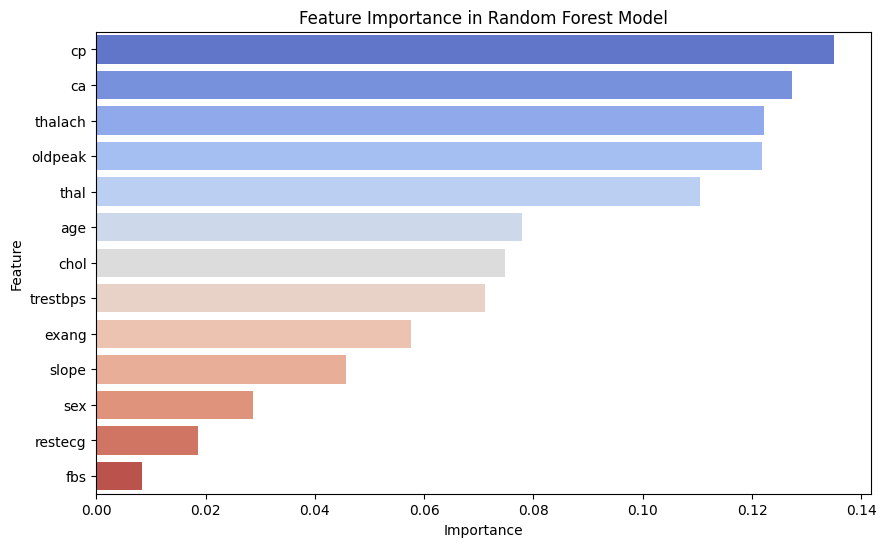

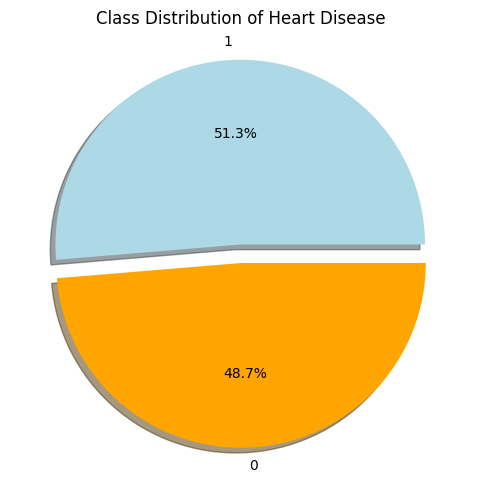

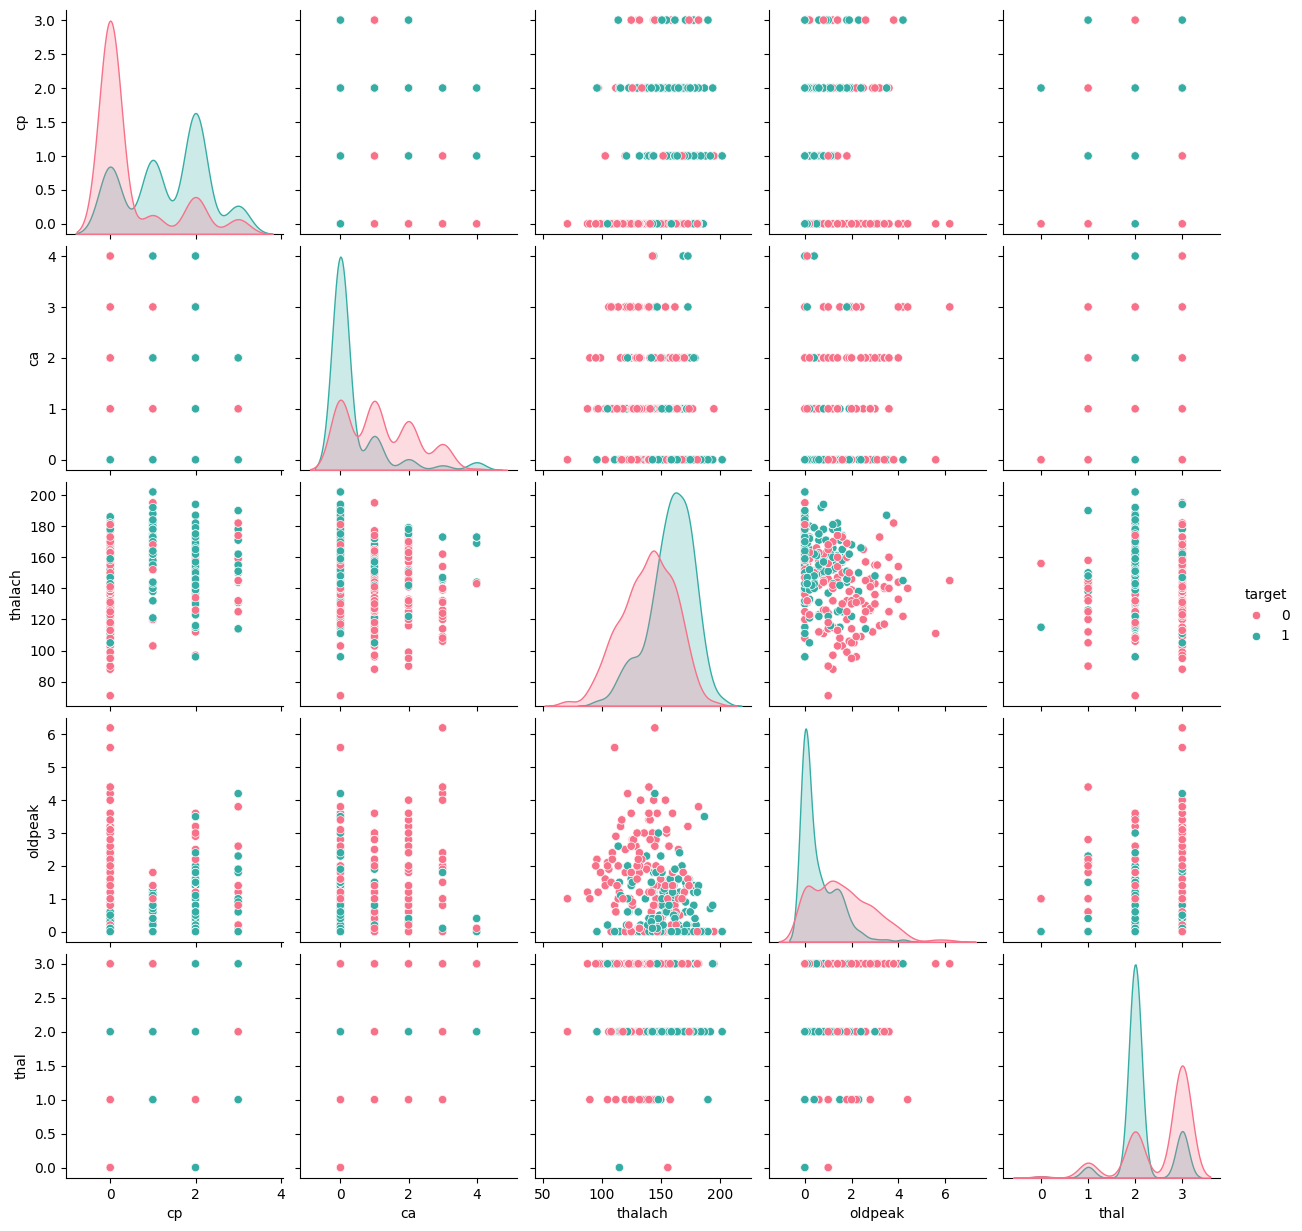

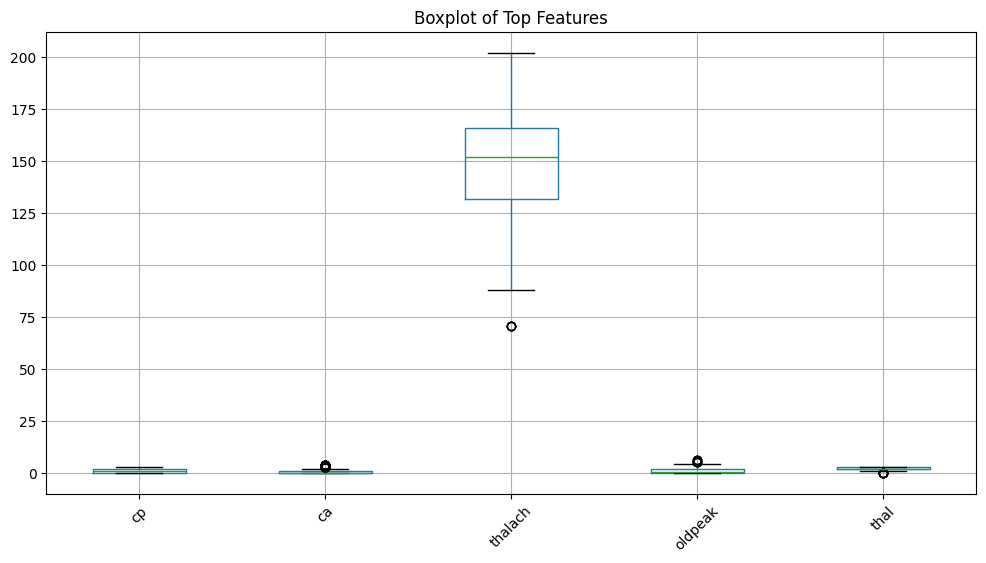

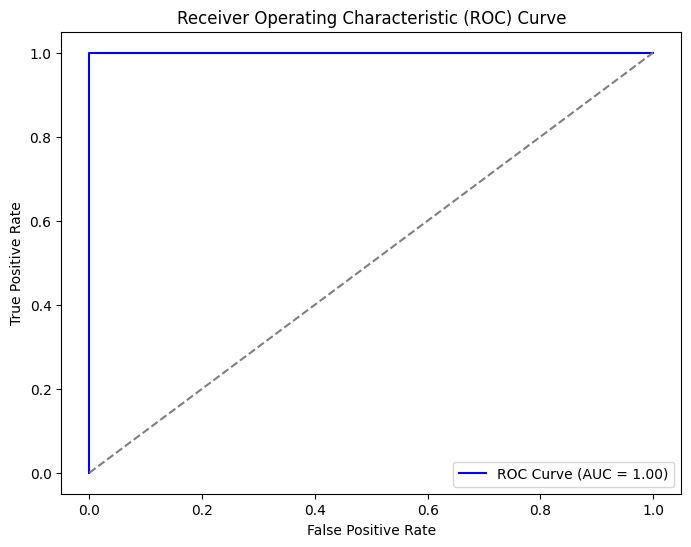

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# 1. Feature Importance Bar Chart
plt.figure(figsize=(10,6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette="coolwarm")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()

# 2. Pie Chart of Class Distribution
plt.figure(figsize=(6,6))
y.value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange'], explode=[0.1,0], shadow=True)
plt.title('Class Distribution of Heart Disease')
plt.ylabel('')
plt.show()

# 3. Pairplot of Important Features
top_features = importance_df['Feature'][:5].tolist()
sns.pairplot(data[top_features + ['target']], hue='target', palette='husl')
plt.show()

# 4. Boxplot of Important Features
plt.figure(figsize=(12,6))
data[top_features].boxplot()
plt.title('Boxplot of Top Features')
plt.xticks(rotation=45)
plt.show()

# 5. ROC Curve
y_prob = rf_classifier.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
